In [2]:
import os
import functools
from itertools import groupby
import operator
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio import SeqIO

from dwave.system import LeapHybridCQMSampler
from dimod import Binary, ConstrainedQuadraticModel

from codon_optimization import *

## 1. SPIKE_SARS2 Spike glycoprotein <br>
### OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049

### 1-1 Load sequences

In [ ]:
sars_cov_protein = SeqIO.read("./SARS_Cov2_glycoprotein_YP_009724390_datasets/protein.faa", "fasta").seq
sars_cov_gene = SeqIO.read("./SARS_Cov2_glycoprotein_YP_009724390_datasets/gene.fna", "fasta").seq

len(sars_cov_protein)

1273

### 1-2 Run D-Wave

In [ ]:
aa_seq = sars_cov_protein #amino acide sequence
weight_params = {'cub_h1': 1, 'cpub_h1': 1, 'cub_h2': 0, 'cpub_h2': 0, 'rep_nuc': 0.75, 'rho_T': 0.5, 'B_rho': 0.4}
organisms = ['h_sapiens', 'sars_cov2']

3819

In [ ]:
H_codon = Codon_Hamiltonian(aa_seq, weight_params)
codon_opt = H_codon.run_Hybrid(host=[0], original=organisms[1], sampleset=False)
opt_codon_seq = ["".join(c) for c in [codon_opt]][0]
opt_codon_seq

### 1-3 Results

DNA name: SPIKE_SARS2 Spike glycoprotein                         \
                                          cub_h1 cpub_h1 cub_h2 cpub_h2   
Weights                                      1.0     1.0    0.0     0.0   

                             
        rep_nuc rho_T B_rho  
Weights    0.75   0.5   0.4

,Optimal Codon Seq
Similarity to ref_codon,0.747578
Effective number of codons,32.446666
GC,50.039277
GC3,61.586803


,h_sapiens,sars_cov2
CAI,0.884450,0.481679
CPB,0.078715,-2.705615


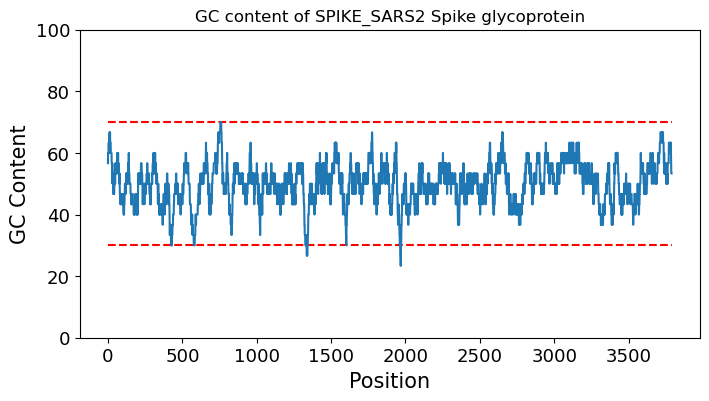

In [ ]:
dp_metrics(name='SPIKE_SARS2 Spike glycoprotein', codon_seq=opt_codon_seq, organisms=organisms, weight_params=weight_params, ref_codon=sars_cov_gene[:-3]) #

For Human,

1. GC ~ mean 40~50%?
2. GC3 ~ mean 70-80%
3. ENC ~ 45?
4. CAI ~ 0.78~0.8
5. CPB ~ 0.08?

## 2. Insulin_sequence <br>
Homo sapiens chromosome 1_On '-' strand of Chromosome 11 (NC_000011.10)

### 1-1 Load sequences

In [ ]:
insulin_human_dna = 'ATGGCCCTGTGGATGCGCCTCCTGCCCCTGCTGGCGCTGCTGGCCCTCTGGGGACCTGACCCAGCCGCAGCCTTTGTGAACCAACACCTGTGCGGCTCACACCTGGTGGAAGCTCTCTACCTAGTGTGCGGGGAACGAGGCTTCTTCTACACACCCAAGACCCGCCGGGAGGCAGAGGACCTGCAGGTGGGGCAGGTGGAGCTGGGCGGGGGCCCTGGTGCAGGCAGCCTGCAGCCCTTGGCCCTGGAGGGGTCCCTGCAGAAGCGTGGCATTGTGGAACAATGCTGTACCAGCATCTGCTCCCTCTACCAGCTGGAGAACTACTGCAACTAG'
insulin_human_protein = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'

len(insulin_human_protein)

110

### 1-2 Run D-Wave

In [ ]:
aa_seq = insulin_human_protein # amino acid sequence
weight_params = {'cub_h1': 0.02, 'cpub_h1': 0.6, 'cub_h2': 0, 'cpub_h2': 0, 'rep_nuc': 1, 'rho_T': 0.46, 'B_rho': 0.048}
organisms = ['e_coli', 'h_sapiens'] # = [host organism, original organism]

In [ ]:
H_codon = Codon_Hamiltonian(aa_seq, weight_params)
codon_opt = H_codon.run_Hybrid(host=[0], original=organisms[1], sampleset=False)
opt_codon_seq = ["".join(c) for c in [codon_opt]][0]
opt_codon_seq

### 1-3 Results

DNA name: Insulin                                            
                   cub_h1 cpub_h1 cub_h2 cpub_h2 rep_nuc rho_T  B_rho
Weights              0.02     0.6    0.0     0.0     1.0  0.46  0.048

,Optimal Codon Seq
Similarity to ref_codon,0.730303
Effective number of codons,32.514179
GC,50.606061
GC3,38.181818


,e_coli,h_sapiens
CAI,0.399218,0.578754
CPB,0.158323,-0.071552


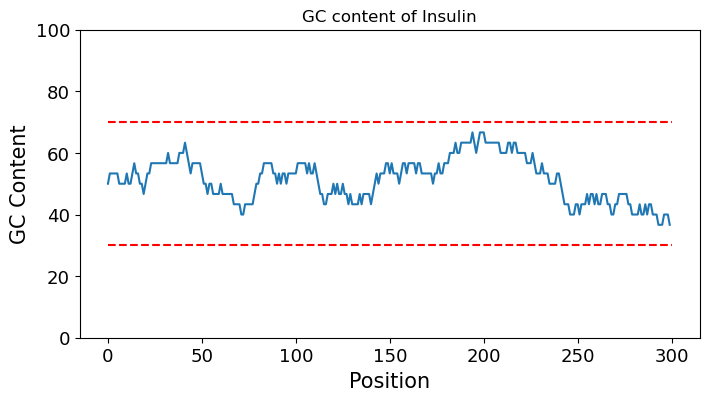

In [ ]:
dp_metrics(name='Insulin', codon_seq=opt_codon_seq, organisms=organisms, weight_params=weight_params, ref_codon=insulin_human_dna[:-3])